In [2]:
from astropy.visualization import (ImageNormalize,
                                   AsymmetricPercentileInterval, ZScaleInterval, PercentileInterval, MinMaxInterval)
from astropy.wcs import WCS
from matplotlib import pyplot as plt
#from reproject import reproject_interp
import numpy as np
from astropy.io import fits as pf
import healpy as hp
from healpy.rotator import Rotator
from astropy.visualization import make_lupton_rgb

In [3]:
hd = pf.open('/home/ssclafani/pi0_decay_healpix_54_SNR_z4kpc_R20kpc_Ts150K_EBV5mag.gz')

In [55]:
pi0 = np.load('/home/ssclafani/DNNCascade/galplane_share/fermipi0_example.npy')

In [60]:
sum(pi0) * hp.nside2pixarea(128)

0.000487571201487527

In [3]:
def treatImg(img, maxval=1, minval=0, q=1):    
    zerosup = img - np.percentile(img, q)
    zerosup[zerosup < 0] = minval
    
    maxperc = np.percentile(zerosup, 100-q)
    maximg = maxval * zerosup / maxperc
    
    maximg[maximg > maxval] = maxval
    
    return maximg.astype(np.float64)

In [4]:
hd = pf.open("/Users/jmsantander/icecube/allsky/mwpan2_RGB_3600.fits")
image = make_lupton_rgb(treatImg(hd[0].data[2]), treatImg(hd[0].data[1]), treatImg(hd[0].data[0]), stretch=0.6, Q=2)


(-20.0, 20.0)

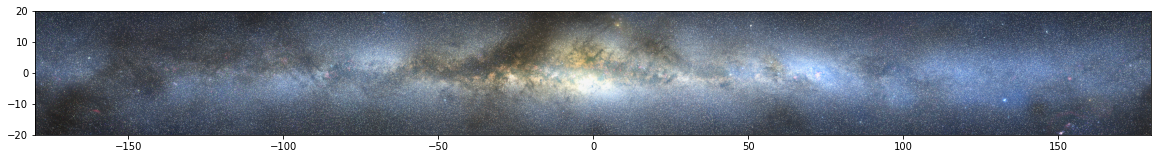

In [9]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.imshow(image, origin='lower', extent=[-180, 180, -90,90])
ax.set_ylim(-20,20)

In [6]:
from reproject import reproject_from_healpix
from astropy.io import fits as af

(-20.0, 20.0)

<Figure size 1440x720 with 0 Axes>

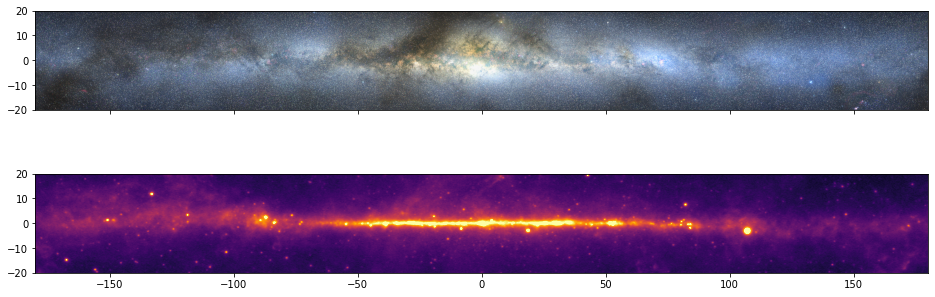

In [22]:
target_header = af.Header.fromstring("""
NAXIS   =                    2
NAXIS1  =                  1440
NAXIS2  =                  720
CTYPE1  = 'GLON'
CRPIX1  =                720.5
CRVAL1  =                0.0
CDELT1  =               -0.225
CUNIT1  = 'deg     '
CTYPE2  = 'GLAT'
CRPIX2  =                360.5
CRVAL2  =                  0.0
CDELT2  =                0.225
CUNIT2  = 'deg     '
COORDSYS= 'icrs    '
""", sep='\n')

from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

fig = plt.figure(figsize=(20,10))


hmap = hp.read_map("/Users/jmsantander/pynb/fermi/mapfermi.fits")
degree = np.pi / 180.


target_wcs = WCS(target_header)

array, footprint = reproject_from_healpix((np.sqrt(hmap), 'G'), target_wcs, 
                                                  shape_out=target_wcs.array_shape, nested=False)


ax.set_ylim(-20,20)

fig, axs = plt.subplots(2,1,figsize=(16,6), sharex=True)

fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=.0)


axs[0].imshow(image, origin='lower', extent=[-180, 180, -90,90])
axs[0].set_ylim(-20,20)

axs[1].imshow(array, origin='lower', extent=[-180, 180, -90,90], vmax=30, cmap=plt.get_cmap("inferno"))
axs[1].set_ylim(-20,20)
